In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from acquire_g import get_zillow_data
from prepare import acquire_and_prep_data, fips_labels, zillow_split, add_scaled_columns

In [2]:
# plt rc sets defaults for matplotlib figures
plt.rc("font", size=13)
plt.rc("figure", figsize= (13,7))

In [3]:
# acquiring the prep data
df = acquire_and_prep_data()
df.head()

,fullbathcnt,sqft,bathroomcnt,bedroomcnt,zip_code,taxamount,home_value,yearbuilt,tax_rate,county
1,2.0,1604,2.0,4,96415,6089.82,498347.0,1950,1.22,Los Angeles County
2,3.0,2384,3.0,3,96452,6679.55,549917.0,1937,1.21,Los Angeles County
3,2.0,1574,2.0,3,97319,3876.31,235272.0,1990,1.65,Los Angeles County
4,2.0,1619,2.0,2,97329,4206.15,340000.0,1983,1.24,Los Angeles County
5,3.0,1936,3.0,3,96124,5278.74,418146.0,1986,1.26,Los Angeles County


In [4]:
# Splitting data into train validate and split
train, validate, test = zillow_split(df)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')
train.head().T

train -> (10432, 10)
validate -> (4472, 10)
test -> (3727, 10)


,2018,11215,19234,6619,16498
fullbathcnt,3,4,2,3,3
sqft,1221,3356,1630,1567,1522
bathroomcnt,3,4,2,3,3
bedroomcnt,3,5,3,3,4
zip_code,96124,96037,96221,96507,96497
taxamount,4561.63,16711.2,975.78,4149.74,5959.9
home_value,379753,1.4e+06,76165,335031,457967
yearbuilt,1985,2004,1952,1957,1984
tax_rate,1.2,1.19,1.28,1.24,1.3
county,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County,Los Angeles County


In [5]:
df.fullbathcnt.value_counts()

2.0    9441
3.0    4242
1.0    4195
4.0     753
Name: fullbathcnt, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10432 entries, 2018 to 6553
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fullbathcnt  10432 non-null  float64
 1   sqft         10432 non-null  int64  
 2   bathroomcnt  10432 non-null  float64
 3   bedroomcnt   10432 non-null  int64  
 4   zip_code     10432 non-null  int64  
 5   taxamount    10432 non-null  float64
 6   home_value   10432 non-null  float64
 7   yearbuilt    10432 non-null  int64  
 8   tax_rate     10432 non-null  float64
 9   county       10432 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 896.5+ KB


In [7]:
train.describe()

,fullbathcnt,sqft,bathroomcnt,bedroomcnt,zip_code,taxamount,home_value,yearbuilt,tax_rate
count,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,10432.000000,1.043200e+04,10432.000000,10432.000000
mean,2.079084,1654.419287,2.119824,3.009298,96507.108800,4920.602837,3.983235e+05,1962.065951,1.328499
std,0.784017,703.802884,0.796901,0.903455,4216.427448,4847.131771,4.164668e+05,22.695220,0.395834
min,1.000000,320.000000,1.000000,0.000000,95982.000000,125.950000,1.151700e+04,1880.000000,0.030000
25%,2.000000,1161.000000,2.000000,2.000000,96152.000000,2449.620000,1.814202e+05,1949.000000,1.190000
50%,2.000000,1488.000000,2.000000,3.000000,96341.000000,3869.050000,3.064875e+05,1960.000000,1.240000
75%,3.000000,1981.250000,3.000000,4.000000,96533.000000,5961.017500,4.923950e+05,1979.000000,1.360000
max,4.000000,8243.000000,4.500000,5.000000,399675.000000,176576.490000,1.472112e+07,2015.000000,15.510000


In [8]:
# Most common types of homes have 1-5 bedrooms. Have a few with 0
train.bedroomcnt.value_counts()

3    4572
2    2588
4    2422
5     496
1     333
0      21
Name: bedroomcnt, dtype: int64

In [9]:
# Most common bathrooms are 1-4
train.bathroomcnt.value_counts()

2.0    4676
3.0    2269
1.0    2268
2.5     566
4.0     375
1.5     129
3.5      92
4.5      57
Name: bathroomcnt, dtype: int64

In [10]:
train.zip_code.value_counts()

96193    125
96361     92
97319     89
97328     88
96368     85
        ... 
97108      1
96039      1
97119      1
96986      1
96148      1
Name: zip_code, Length: 379, dtype: int64

In [11]:
train.sqft.value_counts()

1200    31
960     27
1120    26
1400    24
1080    23
        ..
2052     1
4143     1
3752     1
4183     1
2047     1
Name: sqft, Length: 2654, dtype: int64

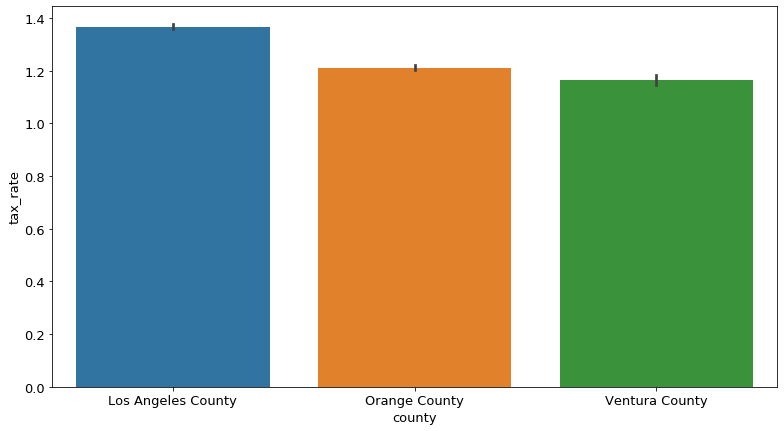

In [12]:
# Shows the tax rate per county. IS THIS THE AVG?
sns.barplot(data=train, y='tax_rate', x='county')

(0, 6)

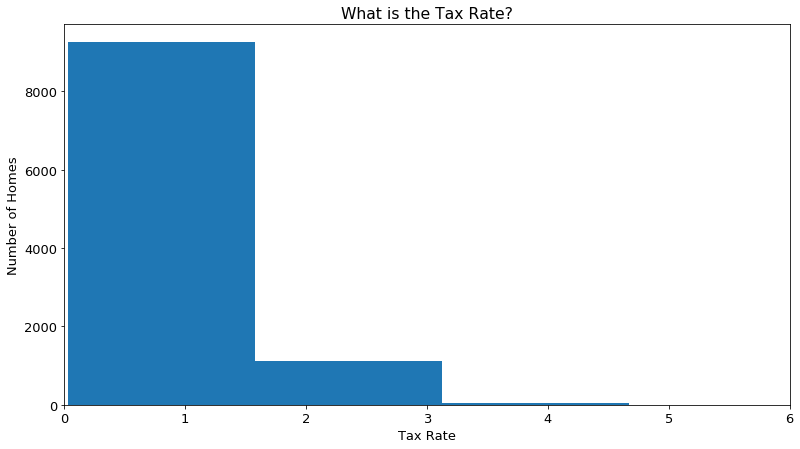

In [13]:
# Majority of homes have a tax rate from 0-1%
plt.hist(train.tax_rate)
plt.xlabel('Tax Rate')
plt.ylabel('Number of Homes')
plt.title('What is the Tax Rate?')
plt.xlim(0,6)

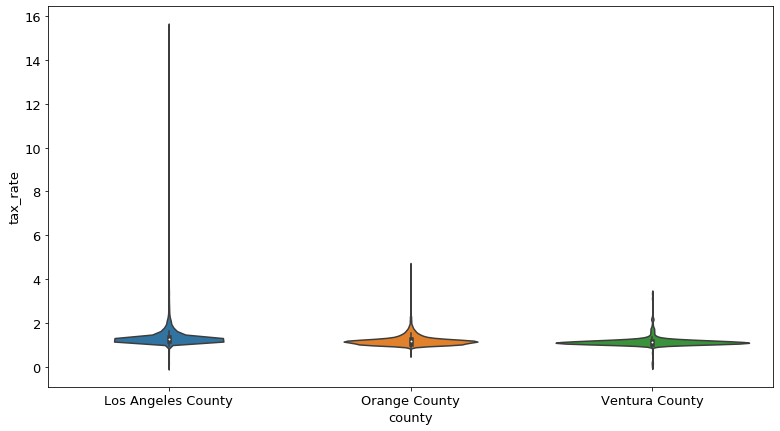

In [14]:
sns.violinplot(data=train, y='tax_rate', x='county')

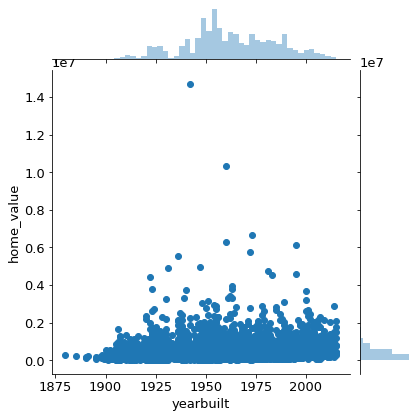

In [15]:
sns.jointplot(x='yearbuilt', y='home_value', data=train)

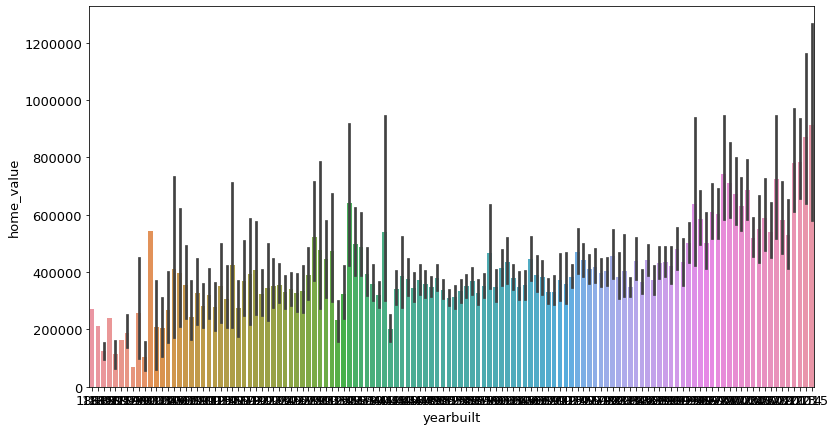

In [16]:
# Shows that newer homes seem to have a higher home value
sns.barplot(x='yearbuilt', y='home_value', data=train)

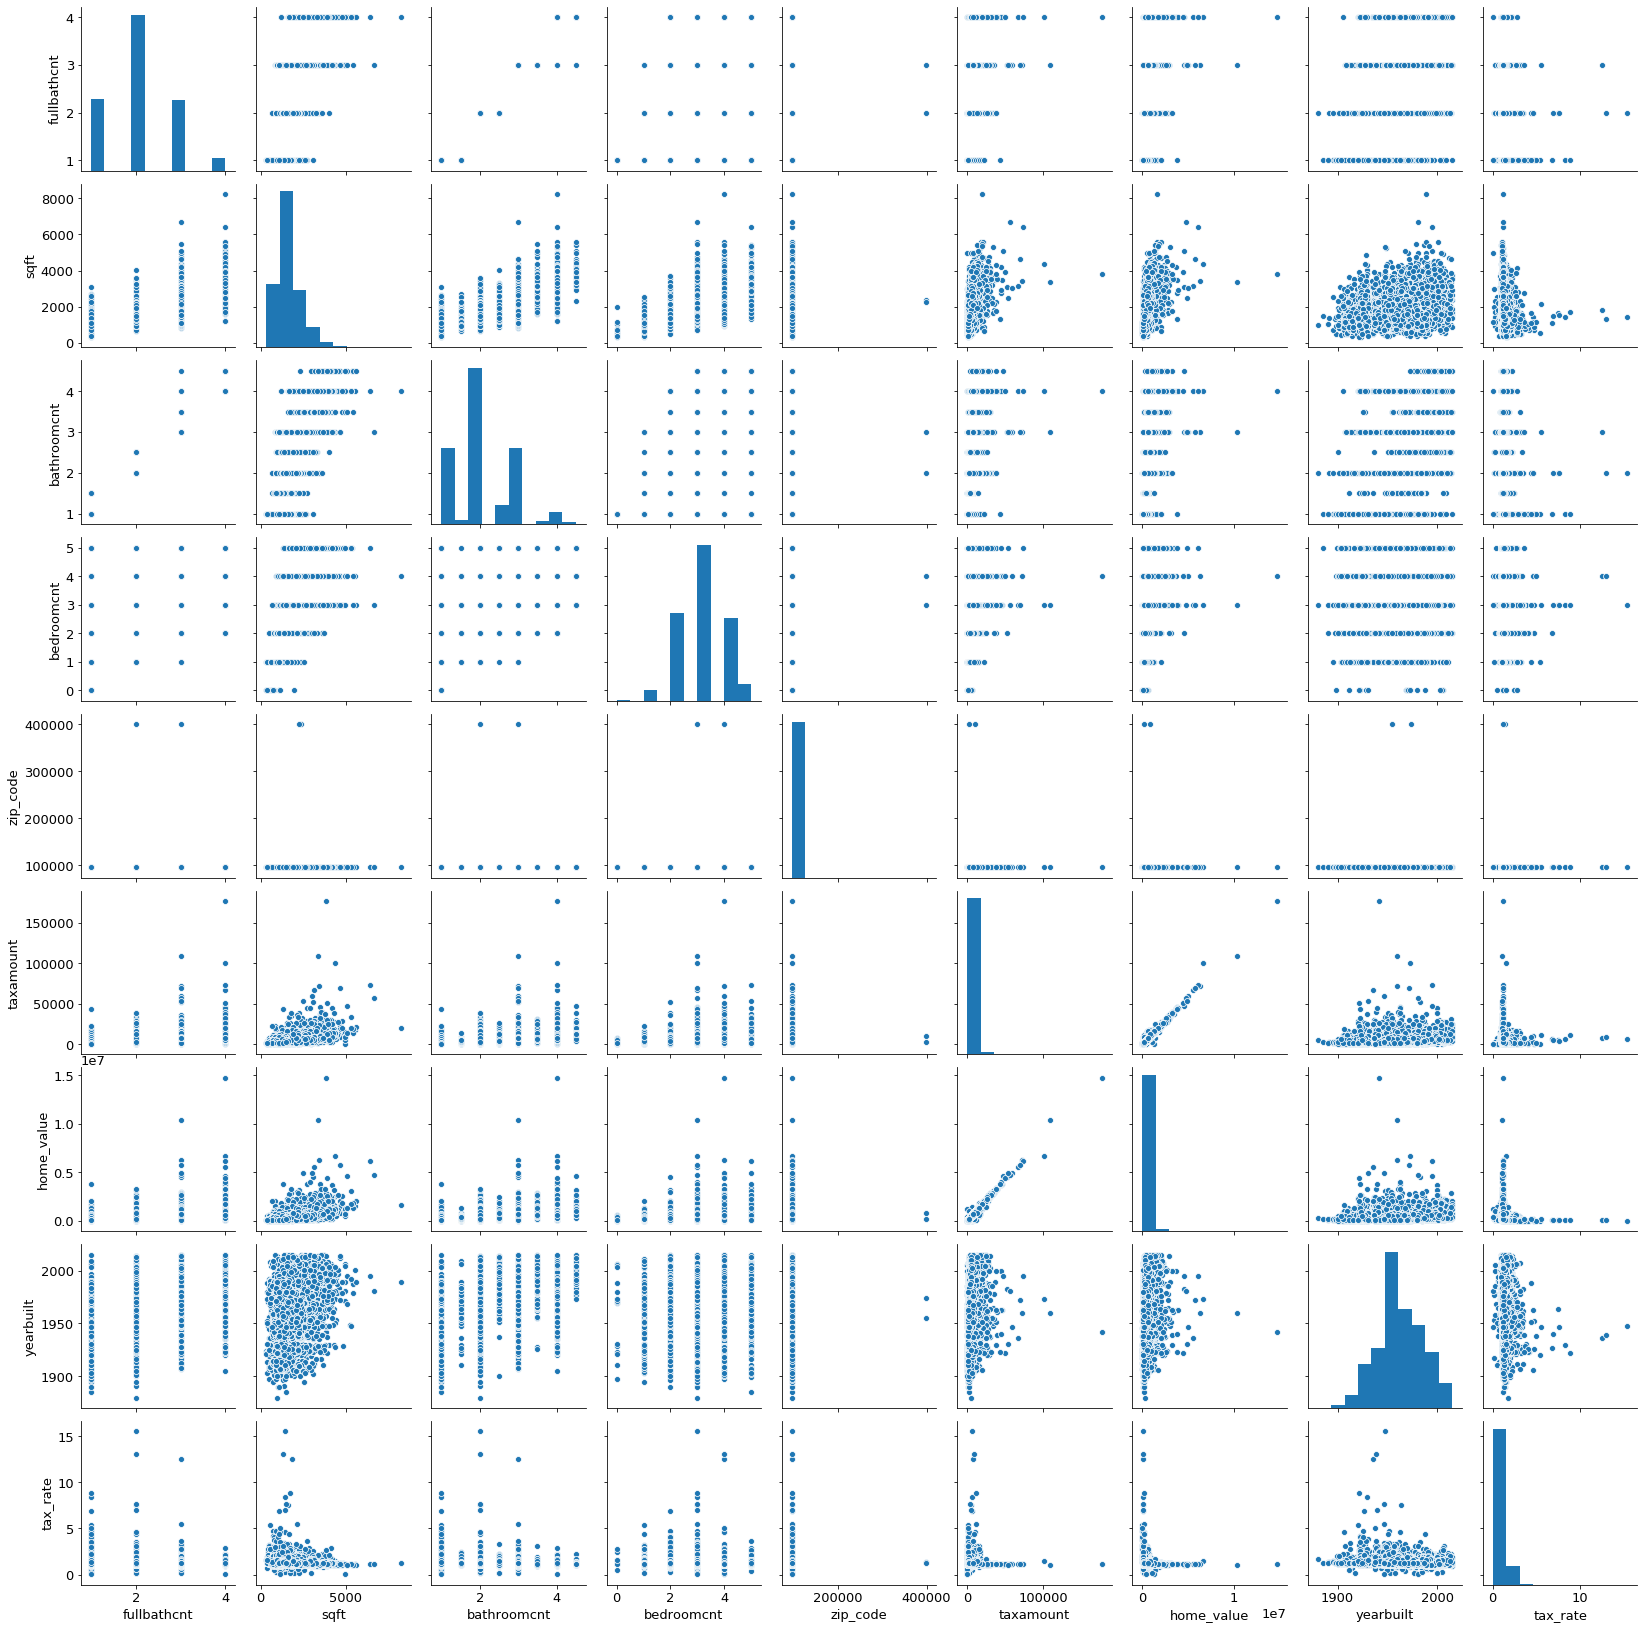

In [17]:
sns.pairplot(train)

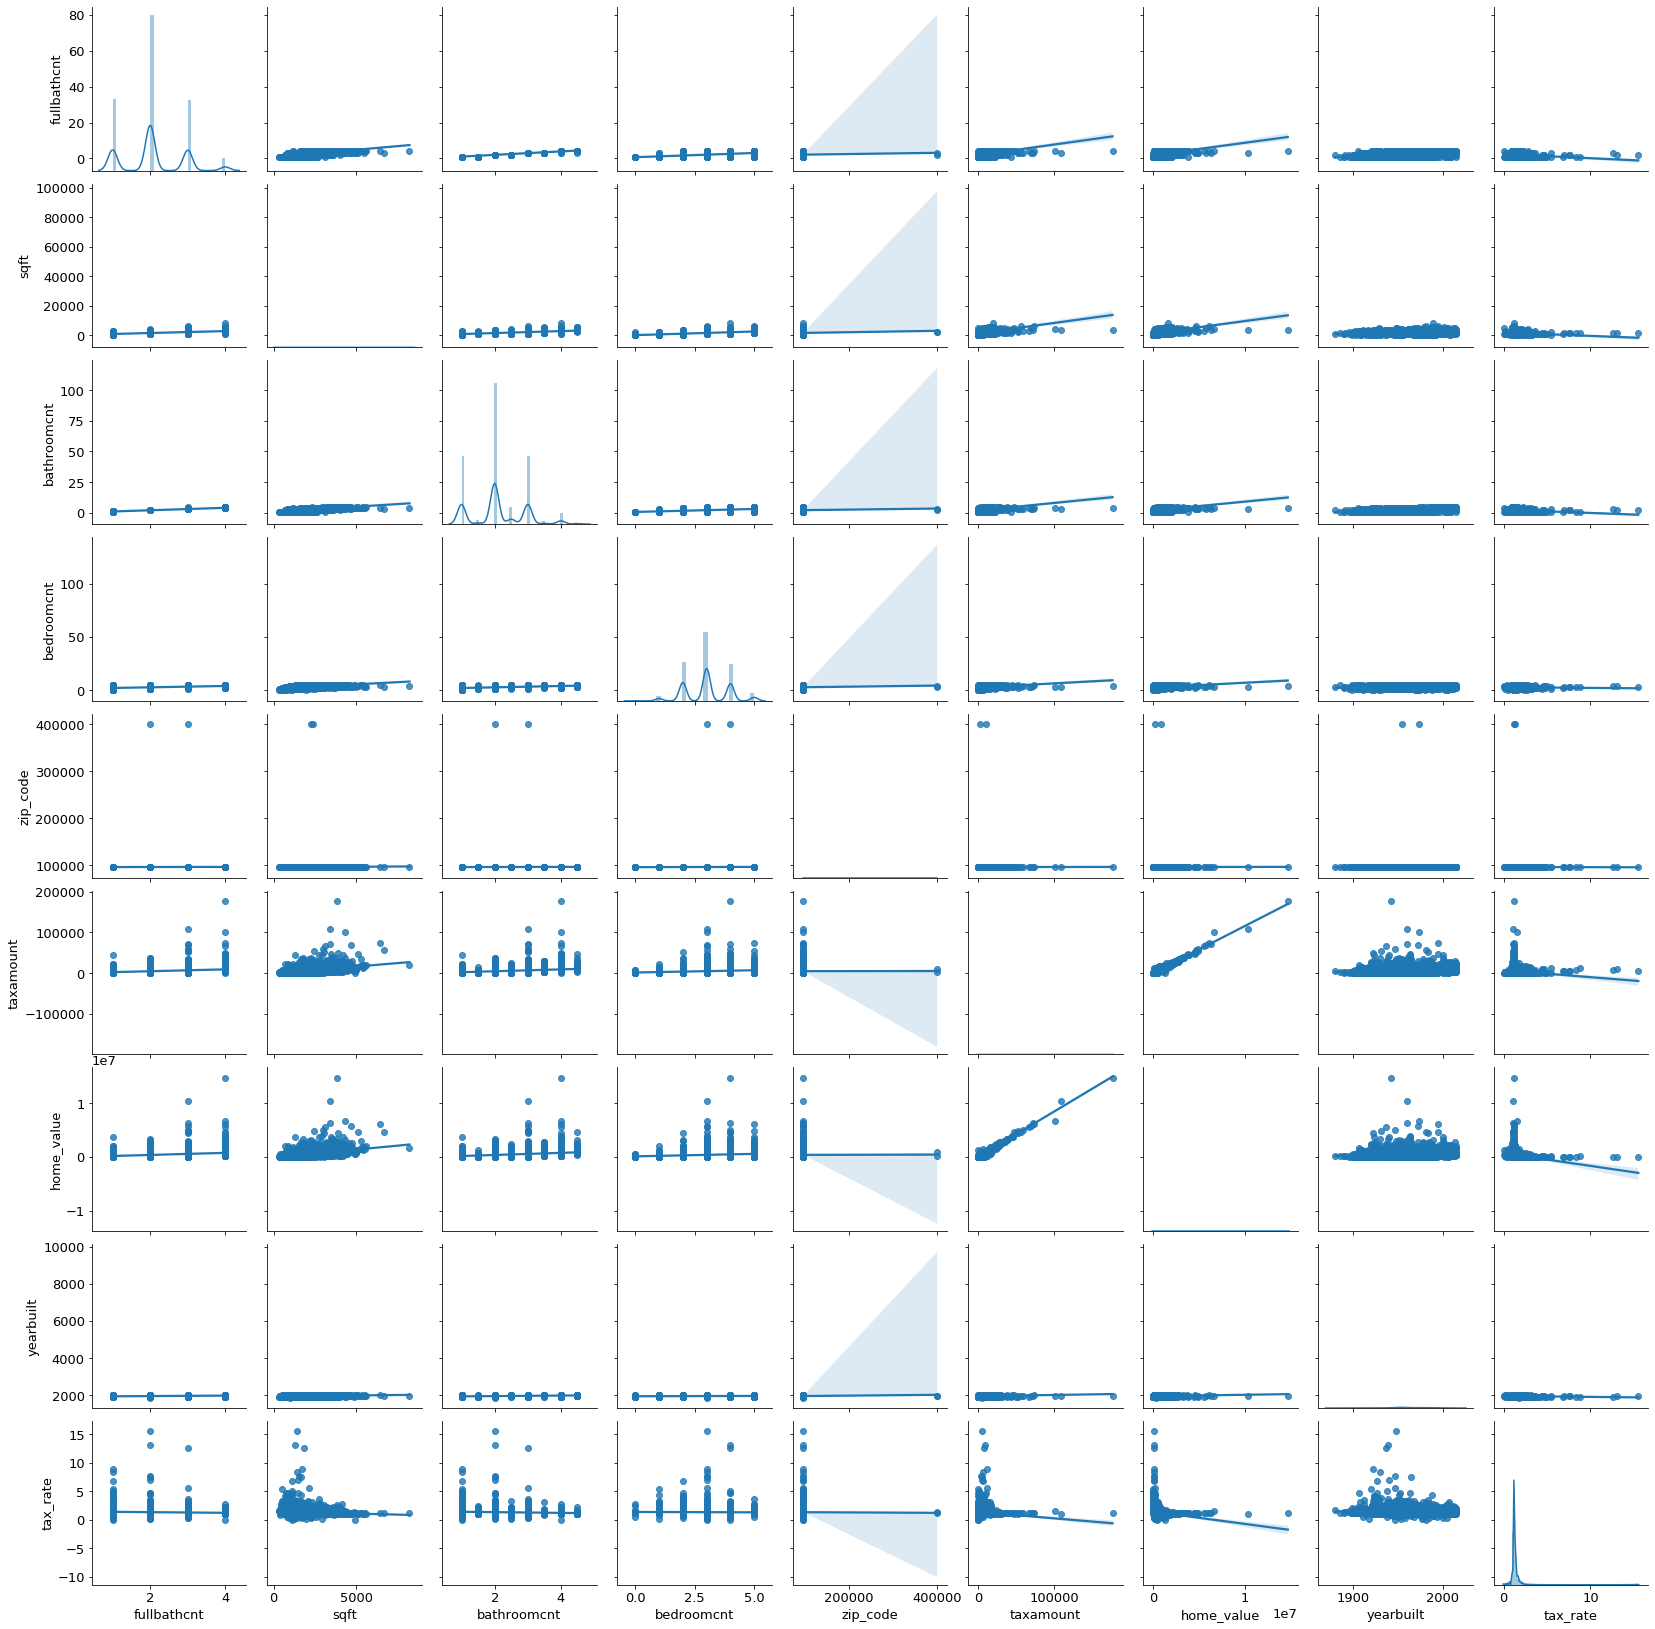

In [18]:
g = sns.PairGrid(train)
# we can specify any two functions we want for visualization
g.map_diag(sns.distplot) # one for a single variable
g.map_offdiag(sns.regplot) # one for the interaction of two variables

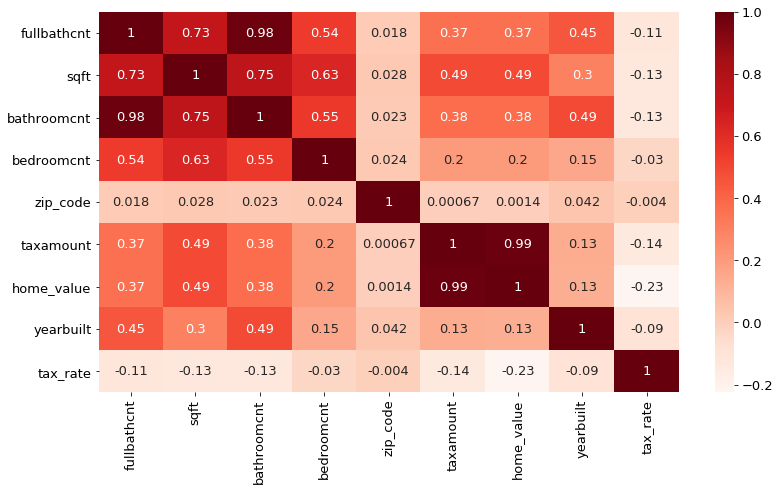

In [19]:
sns.heatmap(train.corr(), cmap='Reds', annot=True)

In [20]:
# sqft, bathrromcnt, and bedroomcnt have the bet correlation
train.corr()

,fullbathcnt,sqft,bathroomcnt,bedroomcnt,zip_code,taxamount,home_value,yearbuilt,tax_rate
fullbathcnt,1.000000,0.727408,0.984966,0.542778,0.018422,0.367288,0.365616,0.451450,-0.114857
sqft,0.727408,1.000000,0.748562,0.632608,0.028398,0.488428,0.493104,0.298304,-0.129447
bathroomcnt,0.984966,0.748562,1.000000,0.551120,0.023367,0.376218,0.377550,0.490728,-0.129858
bedroomcnt,0.542778,0.632608,0.551120,1.000000,0.024293,0.204631,0.201585,0.153151,-0.030012
zip_code,0.018422,0.028398,0.023367,0.024293,1.000000,0.000670,0.001429,0.041584,-0.004018
taxamount,0.367288,0.488428,0.376218,0.204631,0.000670,1.000000,0.987745,0.133802,-0.139032
home_value,0.365616,0.493104,0.377550,0.201585,0.001429,0.987745,1.000000,0.131865,-0.225208
yearbuilt,0.451450,0.298304,0.490728,0.153151,0.041584,0.133802,0.131865,1.000000,-0.089878
tax_rate,-0.114857,-0.129447,-0.129858,-0.030012,-0.004018,-0.139032,-0.225208,-0.089878,1.000000


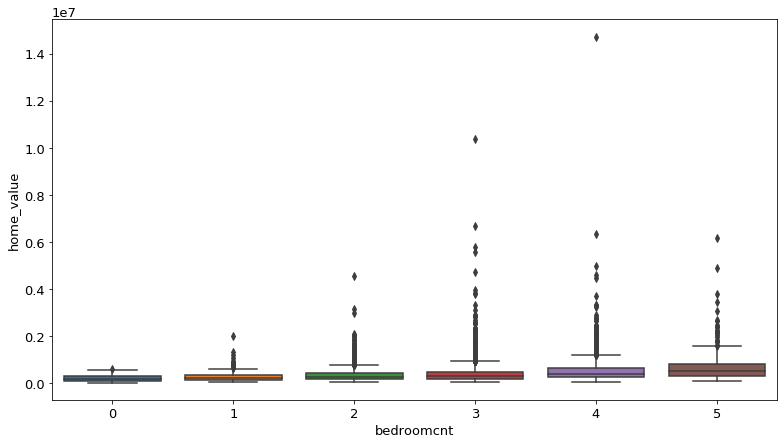

In [21]:
sns.boxplot(data=train, y='home_value', x='bedroomcnt')

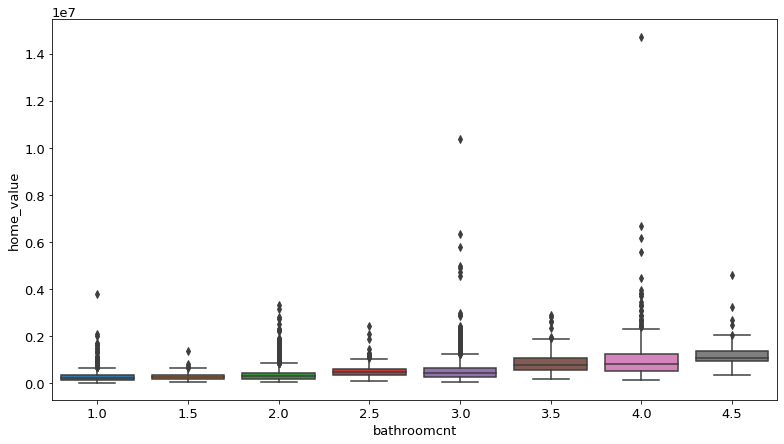

In [22]:
sns.boxplot(data=train, y='home_value', x='bathroomcnt')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

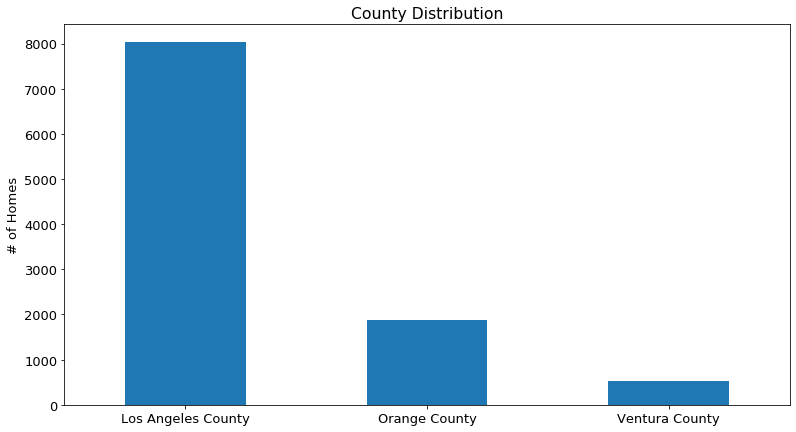

In [23]:
train.county.value_counts().sort_index().plot.bar()
plt.title('County Distribution')
plt.ylabel('# of Homes')
plt.xticks(rotation=0)

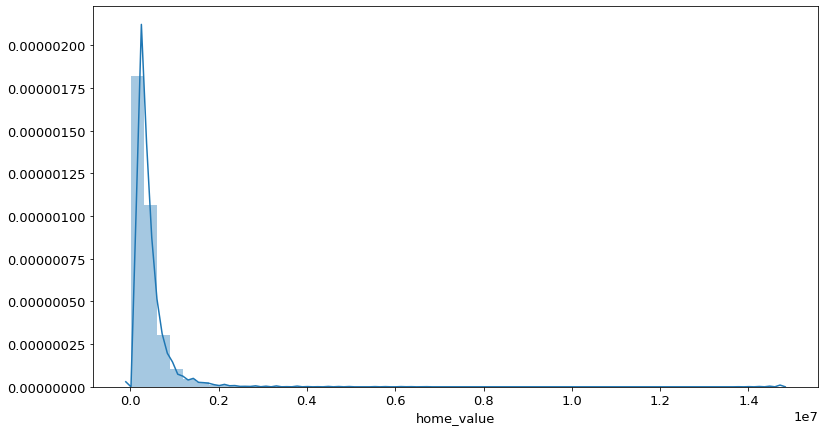

In [24]:
sns.distplot(train[train.county == 'Los Angeles County'].home_value)

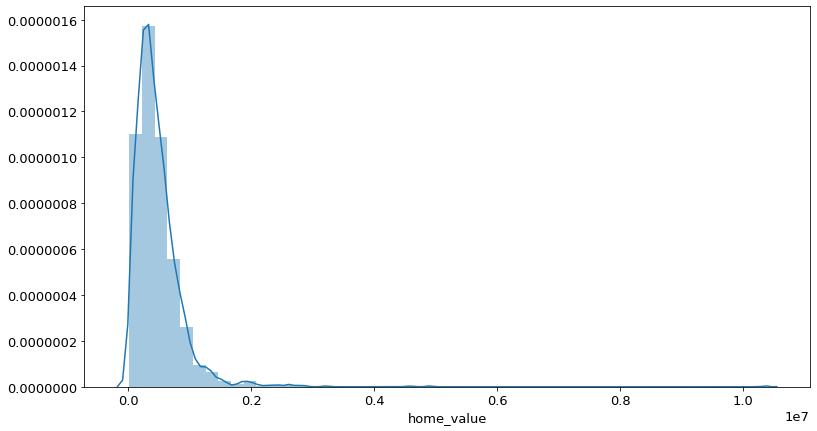

In [25]:
sns.distplot(train[train.county == 'Orange County'].home_value)

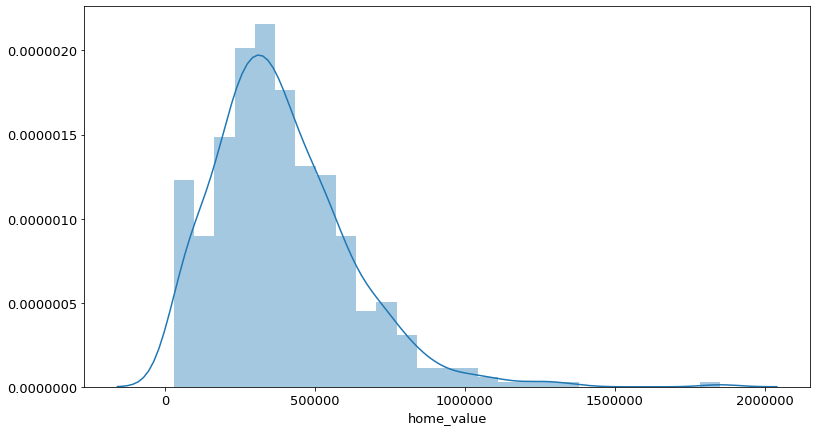

In [26]:
sns.distplot(train[train.county == 'Ventura County'].home_value)

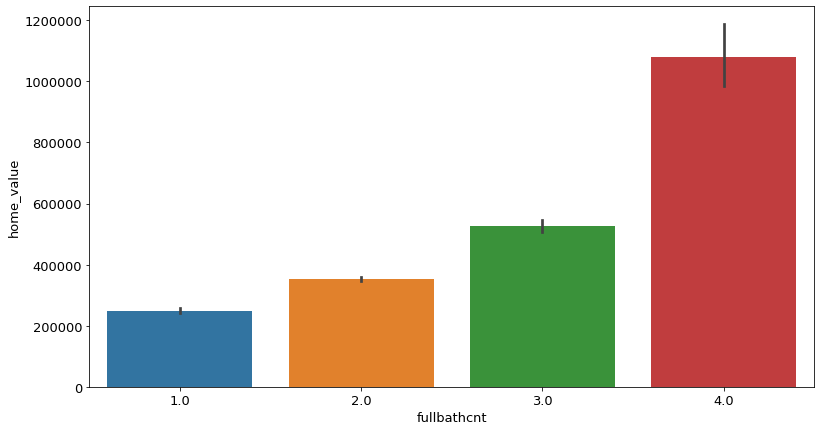

In [32]:
# Shows that newer homes seem to have a higher home value
sns.barplot(x='fullbathcnt', y='home_value', data=train)

In [27]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   acquire_prep_g.ipynb
	modified:   explore_g.ipynb
	modified:   model_g.ipynb
	modified:   prepare.py
	modified:   wrangle.py

no changes added to commit (use "git add" and/or "git commit -a")


In [28]:
#!git add -A

In [29]:
#!git commit -m "Adding explore and wrangle"

In [30]:
#!git push

In [31]:
#!git pull